# Tema: E-Commerce Data

## Integrantes

- Nicole Gómez
- Diego Pinochet
- Max Rosado
- Vicente Torrealba
- Nicolás Valdevenito
- Juan Vásquez

#**Librerías y lectura de datos**

In [ ]:
import os
import pandas as pd
import csv
import numpy as np
from wordcloud import WordCloud, STOPWORDS # Mapa de palabras
import matplotlib.pyplot as plt
import seaborn as sns

Lectura de Datos

In [ ]:
df_init = pd.read_csv('data.csv',encoding="ISO-8859-1")
df_init['InvoiceDate'] = pd.to_datetime(df_init['InvoiceDate'])
df_init.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Información de cada columna:

**- InvoiceNo:** Número de la factura.

**- StockCode:** Código del producto.

**- Description:** Descripción del producto, incluye información de, por ejemplo, la forma y el color.

**- Quantity:** Cantidad de productos.

**- InvoiceDate:** Fecha del producto.

**- UnitPrice:** Precio unitario.

**- CustomerID:** Número de cliente.

**- Country:**Nombre del país donde se hicieron las compras


# **1. Preparacion de los datos**

In [ ]:
# dimensión del data
df_init.shape

(541909, 8)

El dataset tiene 541909 filas y 8 columnas

In [ ]:
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Algunas columnas tienen datos nulos, especialmente las columnas que no coinciden con el total de filas.
Veamos la cantidad de datos nulos que tienen

In [ ]:
df_init.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

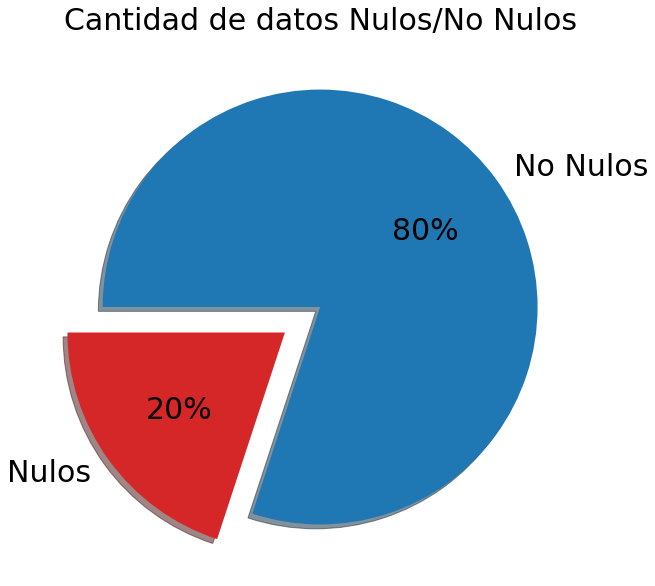

In [ ]:
plt.figure(figsize=(10,10))

x = [135080, 541909]
labels = ['Nulos', 'No Nulos']
colors = [ 'tab:red','tab:blue']
explode = [ 0.2, 0]
plt.pie(x, labels = labels,textprops={"fontsize":30},
          colors = colors,
          autopct='%.0f%%',
          explode = explode,
          shadow = True,
          startangle = 180)
plt.title('Cantidad de datos Nulos/No Nulos', fontsize = 30)
plt.show()

En la columna descripción faltan 1454 datos, mientras que en la columna 'Customer ID' (número del cliente), se registran 135080 datos nulos, esto representa un 24.93% de los datos.
Podemos hacer un nuevo DataFrame que no contenga las filas donde no se tiene información del cliente.

In [ ]:
df = df_init.dropna(subset=["CustomerID"])
df.shape

(406829, 8)

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Al quitar las filas con datos nulos en la columna Customer Id, tambien no se condideraron las filas con datos nulos en la columna Description. Esto indica que las filas con datos nulos en Customer Id tambien tenia datos nulos en Description.

In [ ]:
print('Entradas Duplicadas: {}'.format(df.duplicated().sum()))
df.drop_duplicates(inplace = True)

Entradas Duplicadas: 5225


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Despues de quitar las filas con datos nulos en Customer Id, se logra ver que existen entradas duplicadas y esto puede afectar en el analisis de los datos. Por ello no seran considerados y las quitaremos.

In [ ]:
#dimension del data al quitar las entradas duplicadas
df.shape

(401604, 8)

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# **2. Analisis Exploratorio de los datos**

Veremos cuales son los países donde se hacen la mayoria de ventas. Con el siguiente codigo visualizaremos en un mapa para ver esto.

In [ ]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot

temp = df[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 'InvoiceNo', 'Country']).count()
temp = temp.reset_index(drop = False)
countries = temp['Country'].value_counts()

data = dict(type='choropleth',
locations = countries.index,
locationmode = 'country names', z = countries,
text = countries.index, colorbar = {'title':'Order nb.'},
colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],    
reversescale = False)
#_______________________
layout = dict(title='Número de ordenes por país',
geo = dict(showframe = True, projection={'type':'mercator'}))
#______________
choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate=False)

Gracias a este mapa se logra ver que la mayoria de los datos son de Reino Unido y la cantidad de datos de los otros paises en comparación con este es realtivamente muy pequeño.

In [ ]:
#analisis de las clases de las columnas InvoiceNo, StockCode y CustomerID
print('En la columna InvoiceNo hay',len(df['InvoiceNo'].unique()), 'diferentes datos')
print('En la columna StockCode hay', len(df['StockCode'].unique()), 'diferentes datos')
print('En la columna CustomerID hay', len(df['CustomerID'].unique()), 'diferentes datos')

En la columna InvoiceNo hay 22190 diferentes datos
En la columna StockCode hay 3684 diferentes datos
En la columna CustomerID hay 4372 diferentes datos


Con el siguiente codigo obtendremos un grafico para analizar los CustomerID mas frecuentes.

<ipython-input-15-7f1d11210e0a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



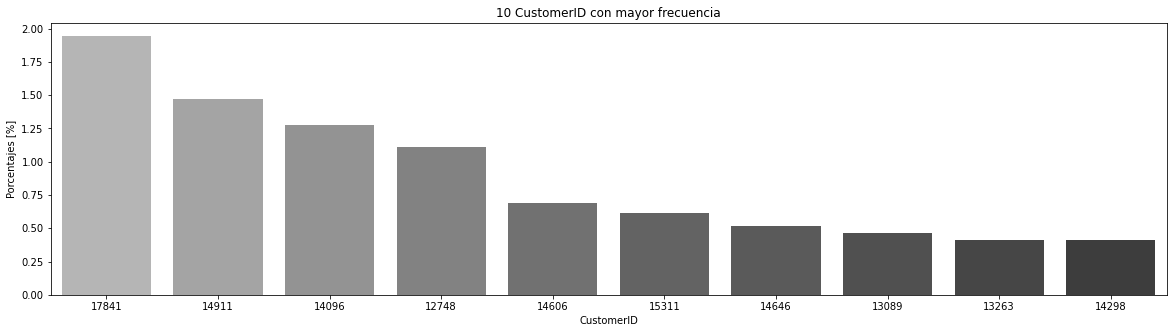

In [ ]:

df["CustomerID"]=df["CustomerID"].astype("int32")
customer_counts = df.CustomerID.value_counts().sort_values(ascending=False).iloc[0:10] 
percent_customer= customer_counts*100/df.shape[0]

plt.figure(figsize=(20,5))
sns.barplot(percent_customer.index, percent_customer.values, order=percent_customer.index, palette ='Greys_d')
plt.ylabel("Porcentajes [%]")
plt.xlabel("CustomerID")
plt.title("10 CustomerID con mayor frecuencia")
plt.show()

Con el siguiente veremos la cantidad de las diferentres transacciones que hay entre los CustomerID e InvoiceNo.

In [ ]:
temp = df.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})
nb_products_per_basket[:10].sort_values('CustomerID')

,CustomerID,InvoiceNo,Number of products
0,12346,541431,1
1,12346,C541433,1
2,12347,537626,31
3,12347,542237,29
4,12347,549222,24
5,12347,556201,18
6,12347,562032,22
7,12347,573511,47
8,12347,581180,11
9,12348,539318,17


Ahora veremos los diferentes valores que hay en la columna Quantity 

In [ ]:
#analisis de los valores de la columna Quantity
df_sort = df.sort_values(['Quantity'])
df_sort.tail(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
433788,573995,16014,SMALL CHINESE STYLE SCISSOR,3000,2011-11-02 11:24:00,0.32,16308,United Kingdom
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749,United Kingdom
160546,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-04-18 13:20:00,2.10,15749,United Kingdom
270885,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,2011-07-19 17:04:00,0.06,14609,United Kingdom
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43:00,0.82,18087,United Kingdom
206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135,United Kingdom
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901,United Kingdom
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom


In [ ]:
df_sort.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838,United Kingdom
160145,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2.10,15749,United Kingdom
160144,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,2011-04-18 13:08:00,1.85,15749,United Kingdom
160143,C550456,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-1930,2011-04-18 13:08:00,2.55,15749,United Kingdom
224419,C556522,22920,HERB MARKER BASIL,-1515,2011-06-13 11:21:00,0.55,16938,United Kingdom
187609,C552995,M,Manual,-1350,2011-05-12 15:19:00,0.16,18133,United Kingdom
160142,C550456,47566B,TEA TIME PARTY BUNTING,-1300,2011-04-18 13:08:00,2.55,15749,United Kingdom
390544,C570556,20971,PINK BLUE FELT CRAFT TRINKET BOX,-1296,2011-10-11 11:10:00,1.06,16029,United Kingdom


Se logra ver que hay valores positivos y negativos en la columna Quantity. Veamos si existe alguna relacion con los valores negativos.

In [ ]:
df_canc = df[(df['Quantity']<0)].sort_values(['Quantity'])
df_canc

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838,United Kingdom
160145,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2.10,15749,United Kingdom
160144,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,2011-04-18 13:08:00,1.85,15749,United Kingdom
...,...,...,...,...,...,...,...,...
178798,C552237,22441,GROW YOUR OWN BASIL IN ENAMEL MUG,-1,2011-05-06 16:44:00,2.10,14056,United Kingdom
349871,C567540,23173,REGENCY TEAPOT ROSES,-1,2011-09-21 10:00:00,9.95,12384,Switzerland
178797,C552237,22380,TOY TIDY SPACEBOY,-1,2011-05-06 16:44:00,2.10,14056,United Kingdom
347950,C567355,22960,JAM MAKING SET WITH JARS,-1,2011-09-19 16:16:00,4.25,15764,United Kingdom


## **2.1 Ordenes canceladas**

Al analizar las filas con cantidades negativas en la columna Quantity, se logra ver que los valores en la columna InvoiceNo tienen al inicio la letra c; además, los numeros que tienen a continuacion ya estan presentes en la misma columna sin esta letra. 

Las filas con cantidad negativo son productos devuelto. Tomando en consideracion esto, eliminaremos estas filas con cantidades negativas y la informacion de estos seran almacenadas en filas con el mismo InvoiceNo.


In [ ]:
nb_products_per_basket['order_canceled'] = nb_products_per_basket['InvoiceNo'].apply(lambda x:int('C' in x))
display(nb_products_per_basket[:5])

n1 = nb_products_per_basket['order_canceled'].sum()
n2 = nb_products_per_basket.shape[0]

print()
print('Número de ordenes cancelados: {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))

,CustomerID,InvoiceNo,Number of products,order_canceled
0,12346,541431,1,0
1,12346,C541433,1,1
2,12347,537626,31,0
3,12347,542237,29,0
4,12347,549222,24,0



Número de ordenes cancelados: 3654/22190 (16.47%) 


El siguiente codigo es utilizado para verificar si existe alguna transacción que fue cancelada (o devuelta) y no existe una compra con la misma cantidad de ventas y el mismo número de cliente

In [ ]:
#codigo para encontrar un producto devuelto
df_check = df[df['Quantity'] < 0][['CustomerID','Quantity',
                                                   'StockCode','Description','UnitPrice']]
for index, col in  df_check.iterrows():
    if df[(df['CustomerID'] == col[0]) & (df['Quantity'] == -col[1]) 
                & (df['Description'] == col[2])].shape[0] == 0: 
        print(df_check.loc[index])
        print(15*'-'+'>'+' HYPOTHESIS NOT FULFILLED')
        break

CustomerID        14527
Quantity             -1
StockCode             D
Description    Discount
UnitPrice          27.5
Name: 141, dtype: object
---------------> HYPOTHESIS NOT FULFILLED


Como si existen, hay un número de transacciones que fueron devueltas y no existen como compras.
El siguiente codigo es similar al codigo anterior, pero evitando encontrar productos discontinuados

In [ ]:
#codigo para encontrar un preducto devuelto y no este descontinuado
df_check = df[(df['Quantity'] < 0) & (df['Description'] != 'Discount')][
                                 ['CustomerID','Quantity','StockCode',
                                  'Description','UnitPrice']]

for index, col in  df_check.iterrows():
    if df[(df['CustomerID'] == col[0]) & (df['Quantity'] == -col[1]) 
                & (df['Description'] == col[2])].shape[0] == 0: 
        print(index, df_check.loc[index])
        print(15*'-'+'>'+' HYPOTHESIS NOT FULFILLED')
        break

154 CustomerID                               15311
Quantity                                    -1
StockCode                               35004C
Description    SET OF 3 COLOURED  FLYING DUCKS
UnitPrice                                 4.65
Name: 154, dtype: object
---------------> HYPOTHESIS NOT FULFILLED


Con el siguiente codigo identificaremos aquellas filas de productos devueltos y no discontinuados que tiene registrado su respectiva compra y cuales no la poseen.

In [ ]:
df_cleaned = df.copy(deep = True)
df_cleaned['QuantityCanceled'] = 0

entry_to_remove = [] ; doubtfull_entry = []

for index, col in  df.iterrows():
    if (col['Quantity'] > 0) or col['Description'] == 'Discount': continue        
    df_test = df[(df['CustomerID'] == col['CustomerID']) &
                         (df['StockCode']  == col['StockCode']) & 
                         (df['InvoiceDate'] < col['InvoiceDate']) & 
                         (df['Quantity']   > 0)].copy()
  
    if (df_test.shape[0] == 0): 
        doubtfull_entry.append(index)
 
    elif (df_test.shape[0] == 1): 
        index_order = df_test.index[0]
        df_cleaned.loc[index_order, 'QuantityCanceled'] = -col['Quantity']
        entry_to_remove.append(index)        

    elif (df_test.shape[0] > 1): 
        df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
        for ind, val in df_test.iterrows():
            if val['Quantity'] < -col['Quantity']: continue
            df_cleaned.loc[ind, 'QuantityCanceled'] = -col['Quantity']
            entry_to_remove.append(index) 
            break  

In [ ]:
print("número de entradas a remover: {}".format(len(entry_to_remove)))
print("número de entradas dudosas: {}".format(len(doubtfull_entry)))

número de entradas a remover: 7521
número de entradas dudosas: 1226


Notemos que existen devoluciones donde no existen la compra debido que probablemente la compra se realizo antes del año 2010, donde se inició este registro. 

En el siguiente código se muestran las transacciones que fueron canceladas y además se encuentran **descontinuadas**.

In [ ]:
df_cleaned.drop(entry_to_remove, axis = 0, inplace = True)
df_cleaned.drop(doubtfull_entry, axis = 0, inplace = True)
remaining_entries = df_cleaned[(df_cleaned['Quantity'] < 0) & (df_cleaned['StockCode'] != 'D')]
print("nb of entries to delete: {}".format(remaining_entries.shape[0]))
remaining_entries.head()

nb of entries to delete: 48


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
77598,C542742,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,-94,2011-01-31 16:26:00,0.65,15358,United Kingdom,0
90444,C544038,22784,LANTERN CREAM GAZEBO,-4,2011-02-15 11:32:00,4.95,14659,United Kingdom,0
111968,C545852,22464,HANGING METAL HEART LANTERN,-5,2011-03-07 13:49:00,1.65,14048,United Kingdom,0
116064,C546191,47566B,TEA TIME PARTY BUNTING,-35,2011-03-10 10:57:00,0.70,16422,United Kingdom,0
132642,C547675,22263,FELT EGG COSY LADYBIRD,-49,2011-03-24 14:07:00,0.66,17754,United Kingdom,0


Se muestra el tipo de texto que se incluye en la columna StockCode, por ejemplo, D representa descontinuada

In [ ]:
list_special_codes = df_cleaned[df_cleaned['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()
list_special_codes

array(['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT'],
      dtype=object)

Se muestra que representa cada notación



In [ ]:
for code in list_special_codes:
    print("{:<15} -> {:<30}".format(code, df_cleaned[df_cleaned['StockCode'] == code]['Description'].unique()[0]))

POST            -> POSTAGE                       
D               -> Discount                      
C2              -> CARRIAGE                      
M               -> Manual                        
BANK CHARGES    -> Bank Charges                  
PADS            -> PADS TO MATCH ALL CUSHIONS    
DOT             -> DOTCOM POSTAGE                


## **2.2 Precio Total:** 

Se crea una nueva columna que represneta el costo total de la transacción, pero se agrega la cantidad de objetos que fueron canceladas, un precio total negativo representa una transacción cancelada o devuelta que no tiene su orden de compra en el registro

In [ ]:
df_cleaned['TotalPrice'] = df_cleaned['UnitPrice'] * (df_cleaned['Quantity'] - df_cleaned['QuantityCanceled'])
df_cleaned.sort_values('CustomerID').head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,74215,0.0
148288,549222,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2011-04-07 10:43:00,4.25,12347,Iceland,0,17.0
428971,573511,22698,PINK REGENCY TEACUP AND SAUCER,12,2011-10-31 12:25:00,2.95,12347,Iceland,0,35.4
428970,573511,47559B,TEA TIME OVEN GLOVE,10,2011-10-31 12:25:00,1.25,12347,Iceland,0,12.5
428969,573511,47567B,TEA TIME KITCHEN APRON,6,2011-10-31 12:25:00,5.95,12347,Iceland,0,35.7


Eliminar los valores negativos, que representan las ordenes canceladas



In [ ]:
temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['TotalPrice'].sum()
basket_price = temp.rename(columns = {'TotalPrice':'Basket Price'})

df['InvoiceDate_int'] = df['InvoiceDate'].astype('int64')
temp = df.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate_int'].mean()
df.drop('InvoiceDate_int', axis = 1, inplace = True)
basket_price.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])

basket_price = basket_price[basket_price['Basket Price'] > 0]
basket_price.sort_values('CustomerID').head(6)

<ipython-input-29-f01eb657c10e>:4: FutureWarning:

casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.

<ipython-input-29-f01eb657c10e>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,CustomerID,InvoiceNo,Basket Price,InvoiceDate
1,12347,537626,711.79,2011-01-18 10:17:00.000000000
2,12347,542237,475.39,2010-12-07 14:57:00.000000000
3,12347,549222,636.25,2011-01-26 14:29:59.999999744
4,12347,556201,382.52,2011-04-07 10:43:00.000000000
5,12347,562032,584.91,2011-06-09 13:01:00.000000000
6,12347,573511,1294.32,2011-08-02 08:48:00.000000000


In [ ]:
df = df_cleaned[df_cleaned['TotalPrice']>0]

##**2.3 Frecuencia de palabras**

El siguiente código toma crea una función que toma la columna de descripción y cuenta las palabras que más se repiten.

In [ ]:
#analisis de la columna description
import datetime, nltk, warnings

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

is_noun = lambda pos: pos[:2] == 'NN'

def keywords_inventory(dataframe, colonne = 'Description'):
    stemmer = nltk.stem.SnowballStemmer("english")
    keywords_roots  = dict()  # collect the words / root
    keywords_select = dict()  # association: root <-> keyword
    category_keys   = []
    count_keywords  = dict()
    icount = 0
    for s in dataframe[colonne]:
        if pd.isnull(s): continue
        lines = s.lower()
        tokenized = nltk.word_tokenize(lines)
        nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
        
        for t in nouns:
            t = t.lower() ; racine = stemmer.stem(t)
            if racine in keywords_roots:                
                keywords_roots[racine].add(t)
                count_keywords[racine] += 1                
            else:
                keywords_roots[racine] = {t}
                count_keywords[racine] = 1
    
    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:  
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    clef = k ; min_length = len(k)            
            category_keys.append(clef)
            keywords_select[s] = clef
        else:
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]
                   
    print("Nb of keywords in variable '{}': {}".format(colonne,len(category_keys)))
    return category_keys, keywords_roots, keywords_select, count_keywords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Se crea un DataFrame solo con la columa Descripción

In [ ]:

df_produits = pd.DataFrame(df['Description'].unique()).rename(columns = {0:'Description'})
df_produits

,Description
0,WHITE HANGING HEART T-LIGHT HOLDER
1,WHITE METAL LANTERN
2,CREAM CUPID HEARTS COAT HANGER
3,KNITTED UNION FLAG HOT WATER BOTTLE
4,RED WOOLLY HOTTIE WHITE HEART.
...,...
3855,"LETTER ""U"" BLING KEY RING"
3856,"LETTER ""W"" BLING KEY RING"
3857,"LETTER ""Z"" BLING KEY RING"
3858,PINK CRYSTAL SKULL PHONE CHARM


In [ ]:
# Se utiliza la función creada anteriormente para obtener la frecuencia de palabras
keywords, keywords_roots, keywords_select, count_keywords = keywords_inventory(df_produits)

Nb of keywords in variable 'Description': 1475


In [ ]:
list_products = []
for k,v in count_keywords.items():
    list_products.append([keywords_select[k],v])
list_products.sort(key = lambda x:x[1], reverse = True)

In [ ]:
# ordena la lista de palabras y su frecuencia
liste = sorted(list_products, key = lambda x:x[1], reverse = True)

(-0.5, 999.5, 269.5, -0.5)

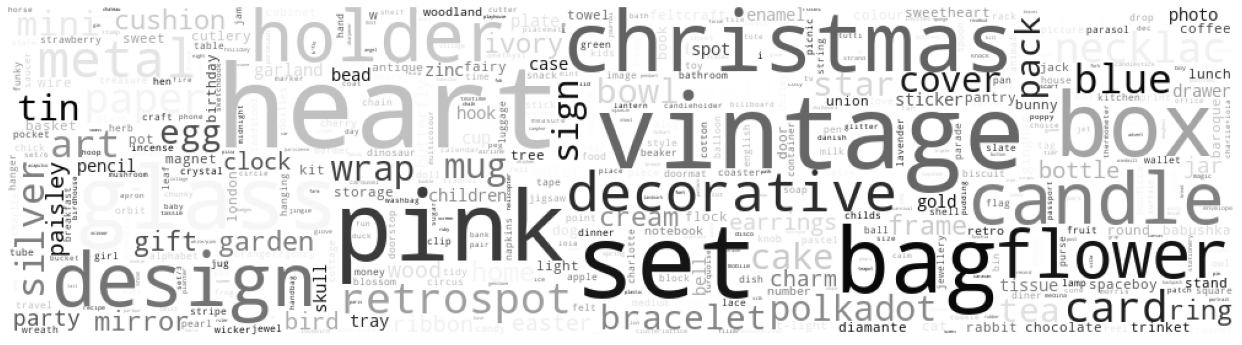

In [ ]:
word=dict()
for i in liste:
  word[i[0]]=i[1]

wordcloud = WordCloud(width=1000,height=270, colormap='Greys',
                      background_color='white',max_words=500,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(word)

plt.figure(figsize=(22,10))
plt.imshow(wordcloud)
plt.axis('off')


In [ ]:
# cuenta las palabras que tienen alguno de los colores que se muestran más abajo
list_products = []
for k,v in count_keywords.items():
    word = keywords_select[k]
    if word in ['pink', 'blue', 'tag', 'green', 'orange']: continue
    if len(word) < 3 or v < 13: continue
    if ('+' in word) or ('/' in word): continue
    list_products.append([word, v])
#______________________________________________________    
list_products.sort(key = lambda x:x[1], reverse = True)
print('Palabras preservadas:', len(list_products))

Palabras preservadas: 189


## **2.4 Filtrar por país**


Se considerarán solo las transacciones realizadas en el Reino Unido

In [ ]:
df_uk = df[df['Country'] == 'United Kingdom']
df_abroad = df[df['Country'] != 'United Kingdom']


In [ ]:
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34


In [ ]:
df_abroad.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583,France,0,90.0
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583,France,0,90.0
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583,France,0,45.0
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583,France,0,10.2
30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583,France,0,15.6


## **2.5 Detectar Outliers**

agregar grafico de caja(boxplot)

Text(0.5, 1.0, 'Detección de Outliers')

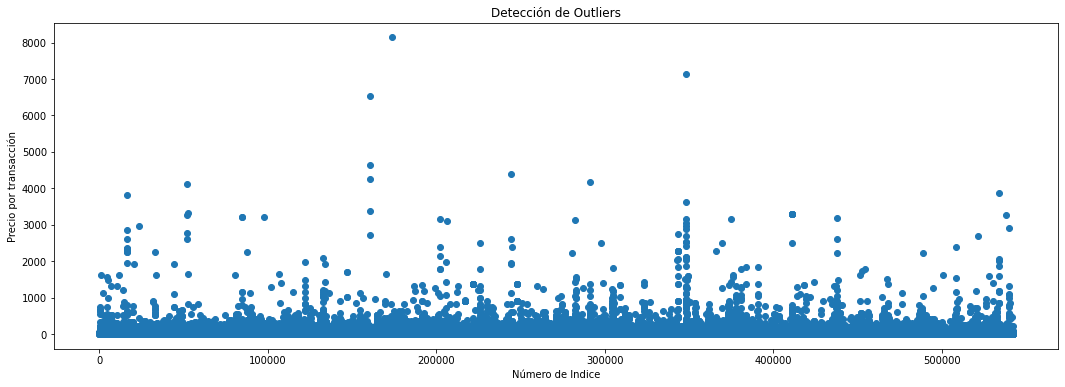

In [ ]:
df = df_uk # se utilizará este nuevo dataframe con información solo del Reino Unido
plt.figure(figsize=(18,6))
plt.scatter(x=df.index, y=df['TotalPrice'])
plt.xlabel('Número de Indice')
plt.ylabel('Precio por transacción')
plt.title('Detección de Outliers')

No se hizo boxplot de estos datos, pues el boxplot que se obtendria no se puede interpretar bien debido que su media es muy baja y hay una gran concentracion de datos en un valor, lo cual no ayuda en su visualizacion.

Eliminaremos solo los 3 puntos con mayor valor

Text(0.5, 1.0, 'Detección de Outliers')

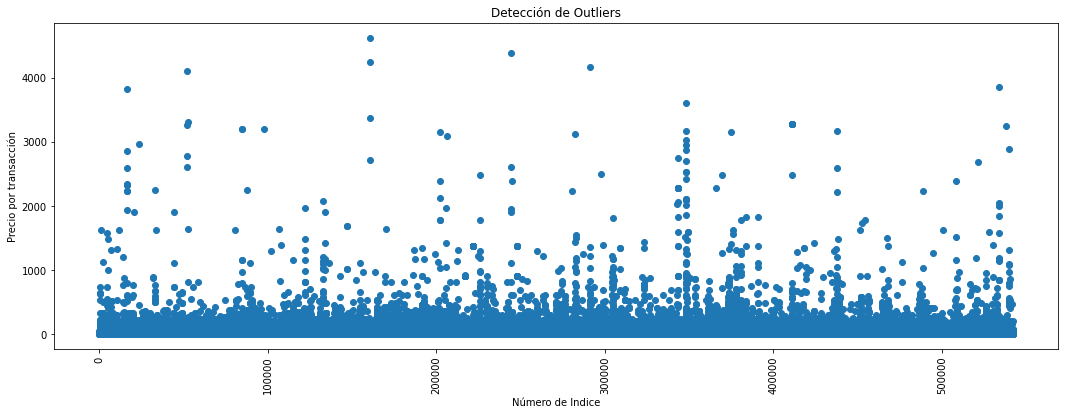

In [ ]:
df = df[df['TotalPrice'] < 5000]
plt.figure(figsize=(18,6))
plt.scatter(x=df.index, y=df['TotalPrice'])
plt.xticks(rotation=90)
plt.xlabel('Número de Indice')
plt.ylabel('Precio por transacción')
plt.title('Detección de Outliers')

In [ ]:
# Opcional
df.quantile([0.05, 0.95, 0.98, 0.99, 0.999])

,Quantity,UnitPrice,CustomerID,QuantityCanceled,TotalPrice
0.050,1.0,0.42,13075.0,0.0,1.25
0.950,36.0,8.50,17954.0,0.0,59.40
0.980,72.0,11.95,18136.0,0.0,105.60
0.990,100.0,12.75,18223.0,1.0,179.00
0.999,500.0,35.75,18283.0,9.0,825.00


In [ ]:
# Opcional
df.quantile([0.2, 0.4, 0.6, 0.8, 0.999])

,Quantity,UnitPrice,CustomerID,QuantityCanceled,TotalPrice
0.200,2.0,0.85,14024.0,0.0,3.30
0.400,3.0,1.65,14971.0,0.0,7.90
0.600,6.0,2.10,16080.0,0.0,14.94
0.800,12.0,4.15,17247.0,0.0,19.92
0.999,500.0,35.75,18283.0,9.0,825.00


Se agrega una columna de mes para realizar una clasificación por temporada

In [ ]:
df_join = df.groupby('InvoiceNo')[['Quantity']].sum()

In [ ]:
# QuantityInv: Representa la cantidad total de productos en una misma factura
df_join = df_join.reset_index()
df_join.head()
#df['InvoiceDate'] = df.index#
df = df.merge(df_join, how='left', on='InvoiceNo')
df = df.rename(columns={'Quantity_x' : 'Quantity', 'Quantity_y' : 'QuantityInv'})
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice,QuantityInv
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,15.30,40
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,40
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,22.00,40


In [ ]:
bins_q = pd.IntervalIndex.from_tuples([(0, 1), (1, 36), (36, 96), (96, 120), (120, 500)])
df['QuantityRange'] = pd.cut(df['Quantity'], bins=bins_q)
bins_p = pd.IntervalIndex.from_tuples([(0, 0.42), (0.42, 8.5), (8.5, 12.75), (12.75, 14.95), (14.95, 40)])
df['PriceRange'] = pd.cut(df['UnitPrice'], bins=bins_p)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice,QuantityInv,QuantityRange,PriceRange
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,15.30,40,"(1, 36]","(0.42, 8.5]"
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,40,"(1, 36]","(0.42, 8.5]"
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,22.00,40,"(1, 36]","(0.42, 8.5]"
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,40,"(1, 36]","(0.42, 8.5]"
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,40,"(1, 36]","(0.42, 8.5]"


In [ ]:
df['Month'] = df['InvoiceDate'].dt.month
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice,QuantityInv,QuantityRange,PriceRange,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,15.30,40,"(1, 36]","(0.42, 8.5]",12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,40,"(1, 36]","(0.42, 8.5]",12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,22.00,40,"(1, 36]","(0.42, 8.5]",12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,40,"(1, 36]","(0.42, 8.5]",12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,40,"(1, 36]","(0.42, 8.5]",12


In [ ]:
bins_d = pd.IntervalIndex.from_tuples([(0,3),(3,6),(6,9),(9,12)])
df['Trimestre'] = pd.cut(df['Month'], bins=bins_d, labels=['q1','q2','q3','q4'])
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice,QuantityInv,QuantityRange,PriceRange,Month,Trimestre
347074,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804,United Kingdom,0,23.4,278,"(1, 36]","(0.42, 8.5]",12,"(9, 12]"
347075,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113,United Kingdom,0,23.6,66,"(1, 36]","(0.42, 8.5]",12,"(9, 12]"
347076,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113,United Kingdom,0,30.0,66,"(1, 36]","(0.42, 8.5]",12,"(9, 12]"
347077,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113,United Kingdom,0,214.8,66,"(1, 36]","(8.5, 12.75]",12,"(9, 12]"
347078,581586,20685,DOORMAT RED RETROSPOT,10,2011-12-09 12:49:00,7.08,13113,United Kingdom,0,70.8,66,"(1, 36]","(0.42, 8.5]",12,"(9, 12]"


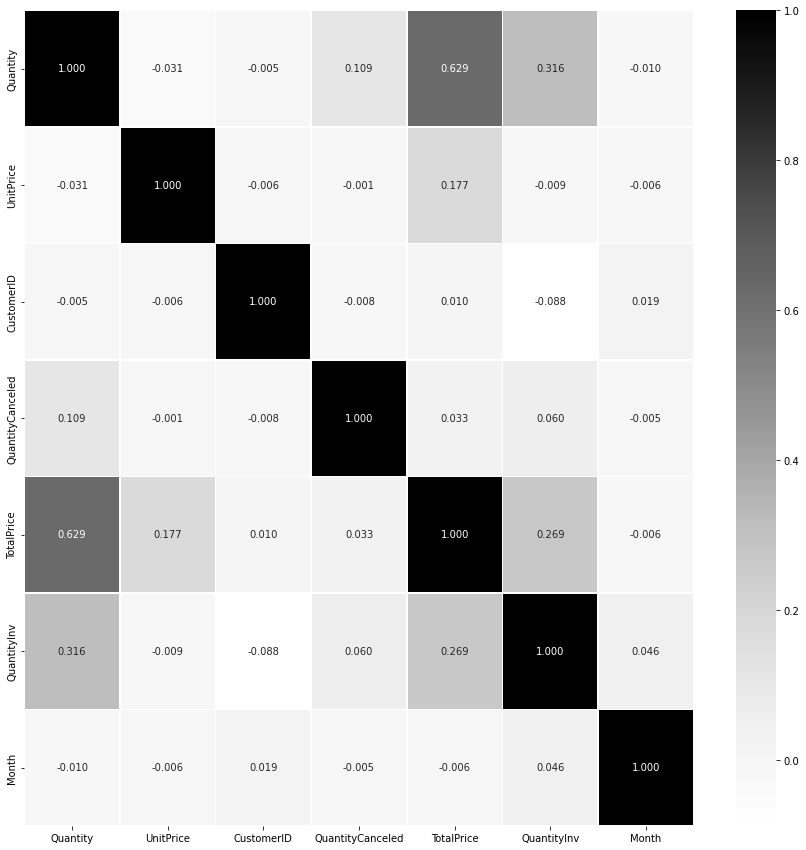

In [ ]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.3f', cmap ='Greys')


In [ ]:
df_model = df[['TotalPrice', 'QuantityInv', 'QuantityRange', 'PriceRange', 'Trimestre']]

df_model.head()

,TotalPrice,QuantityInv,QuantityRange,PriceRange,Trimestre
0,15.30,40,"(1, 36]","(0.42, 8.5]","(9, 12]"
1,20.34,40,"(1, 36]","(0.42, 8.5]","(9, 12]"
2,22.00,40,"(1, 36]","(0.42, 8.5]","(9, 12]"
3,20.34,40,"(1, 36]","(0.42, 8.5]","(9, 12]"
4,20.34,40,"(1, 36]","(0.42, 8.5]","(9, 12]"


In [ ]:
df_data = df_model.copy()
df_data = pd.get_dummies(df_data, columns=['QuantityRange'], prefix='qr')
df_data = pd.get_dummies(df_data, columns=['PriceRange'], prefix='pr')
df_data = pd.get_dummies(df_data, columns=['Trimestre'], prefix='qr')
df_data.head()

,TotalPrice,QuantityInv,"qr_(0, 1]","qr_(1, 36]","qr_(36, 96]","qr_(96, 120]","qr_(120, 500]","pr_(0.0, 0.42]","pr_(0.42, 8.5]","pr_(8.5, 12.75]","pr_(12.75, 14.95]","pr_(14.95, 40.0]","qr_(0, 3]","qr_(3, 6]","qr_(6, 9]","qr_(9, 12]"
0,15.30,40,0,1,0,0,0,0,1,0,0,0,0,0,0,1
1,20.34,40,0,1,0,0,0,0,1,0,0,0,0,0,0,1
2,22.00,40,0,1,0,0,0,0,1,0,0,0,0,0,0,1
3,20.34,40,0,1,0,0,0,0,1,0,0,0,0,0,0,1
4,20.34,40,0,1,0,0,0,0,1,0,0,0,0,0,0,1


In [ ]:
from sklearn.preprocessing import scale #Llevar arriba
df_data['QuantityInv'] = scale(df_data['QuantityInv']) # Normalizar QuantityInv
df_data

,TotalPrice,QuantityInv,"qr_(0, 1]","qr_(1, 36]","qr_(36, 96]","qr_(96, 120]","qr_(120, 500]","pr_(0.0, 0.42]","pr_(0.42, 8.5]","pr_(8.5, 12.75]","pr_(12.75, 14.95]","pr_(14.95, 40.0]","qr_(0, 3]","qr_(3, 6]","qr_(6, 9]","qr_(9, 12]"
0,15.30,-0.625948,0,1,0,0,0,0,1,0,0,0,0,0,0,1
1,20.34,-0.625948,0,1,0,0,0,0,1,0,0,0,0,0,0,1
2,22.00,-0.625948,0,1,0,0,0,0,1,0,0,0,0,0,0,1
3,20.34,-0.625948,0,1,0,0,0,0,1,0,0,0,0,0,0,1
4,20.34,-0.625948,0,1,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347074,23.40,-0.157348,0,1,0,0,0,0,1,0,0,0,0,0,0,1
347075,23.60,-0.574756,0,1,0,0,0,0,1,0,0,0,0,0,0,1
347076,30.00,-0.574756,0,1,0,0,0,0,1,0,0,0,0,0,0,1
347077,214.80,-0.574756,0,1,0,0,0,0,0,1,0,0,0,0,0,1


In [ ]:
df_data.describe() # verificar normalización

,TotalPrice,QuantityInv,"qr_(0, 1]","qr_(1, 36]","qr_(36, 96]","qr_(96, 120]","qr_(120, 500]","pr_(0.0, 0.42]","pr_(0.42, 8.5]","pr_(8.5, 12.75]","pr_(12.75, 14.95]","pr_(14.95, 40.0]","qr_(0, 3]","qr_(3, 6]","qr_(6, 9]","qr_(9, 12]"
count,347079.000000,3.470790e+05,347079.000000,347079.000000,347079.000000,347079.000000,347079.000000,347079.000000,347079.000000,347079.000000,347079.000000,347079.000000,347079.000000,347079.000000,347079.000000,347079.000000
mean,19.633108,5.863202e-17,0.193780,0.763244,0.029757,0.005503,0.006742,0.100577,0.860389,0.030561,0.002455,0.005443,0.168941,0.197520,0.233564,0.399975
std,65.650436,1.000001e+00,0.395259,0.425092,0.169916,0.073978,0.081832,0.300768,0.346583,0.172125,0.049485,0.073573,0.374701,0.398128,0.423098,0.489894
min,0.001000,-7.027353e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.200000,-4.566218e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.200000,-2.636689e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17.700000,7.104545e-02,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,4632.000000,2.262291e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split # Llevar arriba
y = df_data['TotalPrice']
X = df_data.drop(columns=['TotalPrice'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [ ]:
X_train

,QuantityInv,"qr_(0, 1]","qr_(1, 36]","qr_(36, 96]","qr_(96, 120]","qr_(120, 500]","pr_(0.0, 0.42]","pr_(0.42, 8.5]","pr_(8.5, 12.75]","pr_(12.75, 14.95]","pr_(14.95, 40.0]","qr_(0, 3]","qr_(3, 6]","qr_(6, 9]","qr_(9, 12]"
80937,0.169491,1,0,0,0,0,0,1,0,0,0,1,0,0,0
102908,-0.444808,0,1,0,0,0,0,1,0,0,0,0,1,0,0
107672,-0.310923,1,0,0,0,0,0,1,0,0,0,0,1,0,0
268669,-0.545223,1,0,0,0,0,0,1,0,0,0,0,0,0,1
143788,0.240372,0,1,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.189180,0,1,0,0,0,1,0,0,0,0,0,1,0,0
259178,-0.570818,0,1,0,0,0,0,1,0,0,0,0,0,0,1
131932,-0.401492,1,0,0,0,0,0,1,0,0,0,0,1,0,0
146867,0.315190,0,0,1,0,0,0,1,0,0,0,0,1,0,0


In [ ]:
X_test

,QuantityInv,"qr_(0, 1]","qr_(1, 36]","qr_(36, 96]","qr_(96, 120]","qr_(120, 500]","pr_(0.0, 0.42]","pr_(0.42, 8.5]","pr_(8.5, 12.75]","pr_(12.75, 14.95]","pr_(14.95, 40.0]","qr_(0, 3]","qr_(3, 6]","qr_(6, 9]","qr_(9, 12]"
130794,-0.145534,0,1,0,0,0,0,1,0,0,0,0,1,0,0
76494,-0.251855,0,1,0,0,0,0,1,0,0,0,1,0,0,0
307356,-0.356208,1,0,0,0,0,0,1,0,0,0,0,0,0,1
72625,-0.570818,0,1,0,0,0,0,1,0,0,0,1,0,0,0
196295,-0.405430,0,1,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164239,-0.230197,0,1,0,0,0,0,1,0,0,0,0,0,1,0
50297,1.085033,0,1,0,0,0,0,1,0,0,0,1,0,0,0
63284,0.090735,0,1,0,0,0,0,0,1,0,0,1,0,0,0
195995,-0.163255,0,1,0,0,0,0,1,0,0,0,0,0,1,0


# **3.Modelos**

Se utilizarán 3 tipos de regresión: Linear, DecisionTree and RandomForest.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Linear Regression
fit_intercepts = [True, False]
param_grid_linear = dict(fit_intercept=fit_intercepts)
linear_model = LinearRegression()

# Decision Tree
min_tree_splits = range(2,3)
min_tree_leaves = range(2,3)
param_grid_tree = dict(min_samples_split=min_tree_splits,
                       min_samples_leaf=min_tree_leaves)
tree_model = DecisionTreeRegressor()
# Random Forest
estimators_space = [100]
min_sample_splits = range(2,4)
min_sample_leaves = range(2,3)
param_grid_forest = dict(min_samples_split=min_sample_splits,
                       min_samples_leaf=min_sample_leaves,
                       n_estimators=estimators_space)
forest_model = RandomForestRegressor()

cv = 5

models_to_test = ['LinearRegression','DecisionTreeRegressor','RandomForest']
regression_dict = dict(LinearRegression=linear_model,
                       DecisionTreeRegressor=tree_model,
                       RandomForest=forest_model)
param_grid_dict = dict(LinearRegression=param_grid_linear,
                       DecisionTreeRegressor=param_grid_tree,
                       RandomForest=param_grid_forest)
score_dict = {}
params_dict = {}
mae_dict = {}
mse_dict = {}
r2_dict = {}
best_est_dict = {}

for model in models_to_test:
  regressor = GridSearchCV(regression_dict[model], param_grid_dict[model], cv=cv, n_jobs=-1)

  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)

  # Print the tuned parameters and score
  print(" === Start report for regressor {} ===".format(model))
  score_dict[model] = regressor.best_score_
  print("Tuned Parameters: {}".format(regressor.best_params_)) 
  params_dict = regressor.best_params_
  print("Best score is {}".format(regressor.best_score_))
# Compute metrics
  mae_dict[model] = mean_absolute_error(y_test, y_pred)
  print("MAE for {}".format(model))
  print(mean_absolute_error(y_test, y_pred))
  mse_dict[model] = mean_squared_error(y_test, y_pred)
  print("MSE for {}".format(model))
  print(mean_squared_error(y_test, y_pred))
  r2_dict[model] = r2_score(y_test, y_pred)
  print("R2 score for {}".format(model))
  print(r2_score(y_test, y_pred))
  print(" === End of report for regressor {} === \n".format(model))
  
  # Add best estimator to the dict
  best_est_dict[model] = regressor.best_estimator_


  


 === Start report for regressor LinearRegression ===
Tuned Parameters: {'fit_intercept': True}
Best score is 0.4125871227438682
MAE for LinearRegression
13.207966333410166
MSE for LinearRegression
2407.80868201938
R2 score for LinearRegression
0.4375720734114237
 === End of report for regressor LinearRegression === 

 === Start report for regressor DecisionTreeRegressor ===
Tuned Parameters: {'min_samples_leaf': 2, 'min_samples_split': 2}
Best score is 0.6104962480294266
MAE for DecisionTreeRegressor
10.001152512662781
MSE for DecisionTreeRegressor
1597.8948264743651
R2 score for DecisionTreeRegressor
0.6267557796963885
 === End of report for regressor DecisionTreeRegressor === 

 === Start report for regressor RandomForest ===
Tuned Parameters: {'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best score is 0.664786621365228
MAE for RandomForest
9.872764321686196
MSE for RandomForest
1493.3545860606657
R2 score for RandomForest
0.6511748089573166
 === End of report 

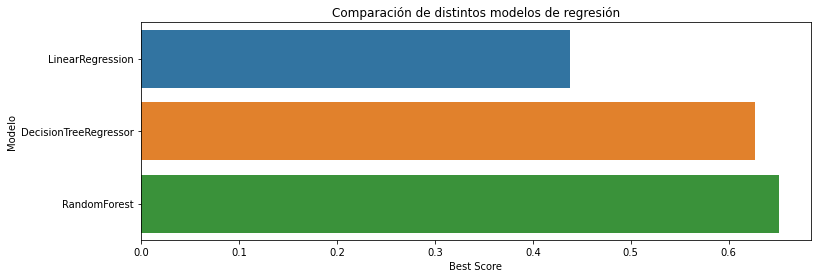

In [ ]:
# Creating summary report
summary_cols = ['Best Score']
summary = pd.DataFrame.from_dict(r2_dict, orient='index')
summary.index.name = 'Modelo'
summary.columns = summary_cols
summary = summary.reset_index()

# Visualizing results
plt.figure(figsize=(12,4))
plt.xlabel('Best score')
plt.title('Comparación de distintos modelos de regresión')

sns.barplot(x='Best Score', y='Modelo', data=summary)

Coefficients:  [ 5.00697466e+00 -8.62577003e+02 -8.48346456e+02 -7.84192129e+02
 -7.11965702e+02 -5.45015508e+02 -2.83968374e+02 -2.58919698e+02
 -2.36835641e+02 -2.31547314e+02 -2.31574929e+02  1.95624016e+14
  1.95624016e+14  1.95624016e+14  1.95624016e+14]
Variance score: 0.4375720734114237


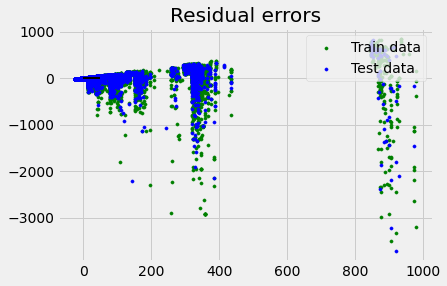

In [ ]:
# train the model using the training sets
linear_model.fit(X_train, y_train)
  
# regression coefficients
print('Coefficients: ', linear_model.coef_)
  
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(linear_model.score(X_test, y_test)))
  
# plot for residual error
  
## setting plot style
plt.style.use('fivethirtyeight')
  
## plotting residual errors in training data
plt.scatter(linear_model.predict(X_train), linear_model.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
  
## plotting residual errors in test data
plt.scatter(linear_model.predict(X_test), linear_model.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
  
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
  
## plotting legend
plt.legend(loc = 'upper right')
  
## plot title
plt.title("Residual errors")
  
## method call for showing the plot
plt.show()

In [ ]:
def mae(targets, predictions) -> float:
    """
    Calculo de la metrica: mean absolute error (MAE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    return round(np.abs(error).mean(), 4)


def mse(targets, predictions) -> float:
    """
    Calculo de la metrica: mean squared error (MSE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    return round((error ** 2).mean(), 4)


def rmse(targets, predictions) -> float:
    """
    Calculo de la metrica: root mean squared error (RMSE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    return round(np.sqrt((error ** 2).mean()), 4)


# b) Percentage errors

def mape(targets, predictions) -> float:
    """
    Calculo de la metrica: mean absolute percentage error (MAPE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets

    if any(x == 0 for x in targets):
        return np.inf
    else:
        return round(np.abs(error / targets).mean(),4)


def maape(targets, predictions) -> float:
    """
    Calculo de la metrica:  mean arctangent percentage error  (MAAPE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """

    error = predictions - targets

    if any((x, y) == (0, 0) for x, y in zip(predictions, targets)):
        return np.inf

    else:
        return round(np.arctan(np.abs(error / targets)).mean(),4)


def wmape(targets, predictions) -> float:
    """
    Calculo de la metrica:  weighted mean absolute percentage error (WMAPE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    sum_values = np.sum(targets)

    if sum_values == 0:
        return np.inf
    else:
        return round(np.abs(error).sum() / sum_values,4)


def mmape(targets, predictions) -> float:
    """
    Calculo de la metrica: modified mean absolute percentage error (MMAPE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = np.abs(predictions - targets)
    denom = 1 + np.abs(targets)

    return round(np.mean(error / denom),4)


def smape(targets, predictions) -> float:
    """
    Calculo de la metrica: symmetric mean absolute percentage error (SMAPE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    sum_values = np.abs(predictions) + np.abs(targets)

    if any(x == 0 for x in sum_values):
        return np.inf

    else:
        return round(2 * np.mean(np.abs(error) / sum_values),4)

def summary_metrics(df) -> pd.DataFrame:
    """
    Aplicar las distintas metricas definidas
    :param df:  dataframe con las columnas: ['y','yhat']
    :return: dataframe con las metricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mae(y_true, y_pred), 4)]
    df_result['mse'] = [round(mse(y_true, y_pred), 4)]
    df_result['rmse'] = [round(rmse(y_true, y_pred), 4)]

    df_result['mape'] = [round(mape(y_true, y_pred), 4)]
    df_result['maape'] = [round(maape(y_true, y_pred), 4)]
    df_result['wmape'] = [round(wmape(y_true, y_pred), 4)]
    df_result['mmape'] = [round(mmape(y_true, y_pred), 4)]
    df_result['smape'] = [round(smape(y_true, y_pred), 4)]

    return df_result

In [ ]:
cols = ['InvoiceDate','TotalPrice']
y2 = df[cols].set_index('InvoiceDate').resample('D').mean()
y2.describe()

,TotalPrice
count,305.000000
mean,19.977204
std,7.254412
min,6.941652
25%,15.824790
50%,19.424648
75%,22.896904
max,73.551982


In [ ]:
cols = ['InvoiceDate','TotalPrice']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%Y-%m-%d')
y = df[cols].set_index('InvoiceDate').resample('W').sum()
y2 = df[cols].set_index('InvoiceDate').resample('M').sum()
#y['InvoiceDate'] = pd.to_datetime(y['InvoiceDate'], format='%Y-%m-%d')
#aux = df[['InvoiceDate','TotalPrice']]
#aux['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%Y-%m-%d')
#y=aux.set_index('InvoiceDate').resample('D').mean()
#y.index.names = ['date']
#y['date'] = pd.to_datetime(df['InvoiceDate'], format='%Y-%m-%d')

#y = y.dropna(subset=["TotalPrice"])
#y['TotalPrice'].fillna(21.18777, inplace = True)
df = df.sort_values(['InvoiceDate'])
y.head(80)



,TotalPrice
InvoiceDate,
2010-12-05,131632.490
2010-12-12,183115.080
2010-12-19,141255.180
2010-12-26,29923.620
2011-01-02,0.000
2011-01-09,93930.250
2011-01-16,87114.780
2011-01-23,64018.360
2011-01-30,78300.900


In [ ]:
y = y.dropna(subset=["TotalPrice"])
df = df.sort_values(['InvoiceDate'])
y.head()

,TotalPrice
InvoiceDate,
2010-12-05,131632.49
2010-12-12,183115.08
2010-12-19,141255.18
2010-12-26,29923.62
2011-01-02,0.00


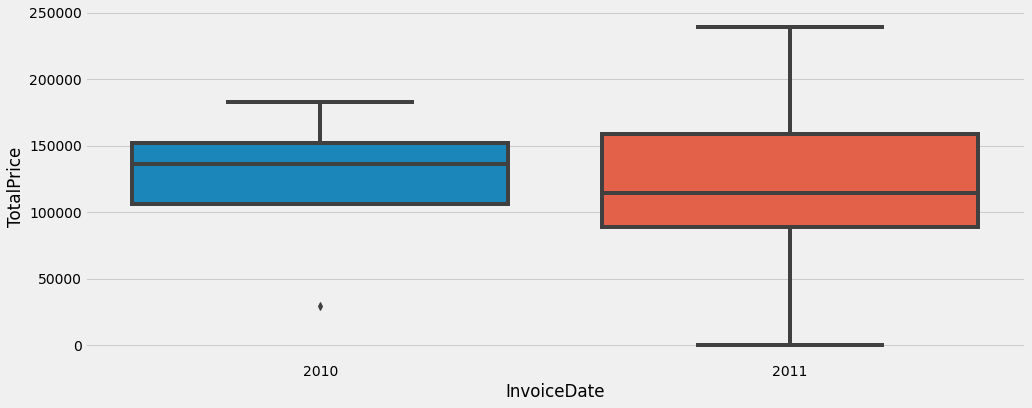

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(x = y.index.year, y = y.TotalPrice, ax=ax)
plt.show()

In [ ]:
y.isnull().sum()

TotalPrice    0
dtype: int64

In [ ]:
y.describe()

,TotalPrice
count,54.000000
mean,126189.618407
std,53180.146342
min,0.000000
25%,89244.492500
50%,118465.210000
75%,158601.827500
max,239008.991000


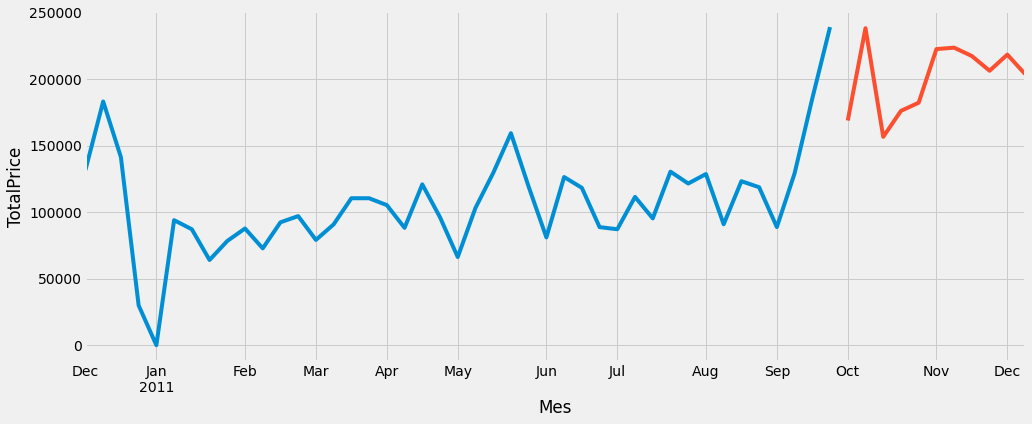

In [ ]:
target_date =  '2011-10-01'

# crear conjunto de entrenamiento y de testeo
mask_ds = y.index < target_date 

y_train = y[mask_ds]
y_test = y[~mask_ds]

#plotting the data
fig, ax = plt.subplots(figsize=(15,6))
y_train['TotalPrice'].plot()
y_test['TotalPrice'].plot()
plt.xlabel('Mes')
plt.ylabel('TotalPrice')
plt.show()


In [ ]:
y_test

,TotalPrice
InvoiceDate,
2011-10-02,168804.461
2011-10-09,238163.640
2011-10-16,156551.620
2011-10-23,176047.110
2011-10-30,182202.580
2011-11-06,222490.890
2011-11-13,223551.610
2011-11-20,217264.200
2011-11-27,206200.110


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning:

The 'freq' argument in Timestamp is deprecated and will be removed in a future version.



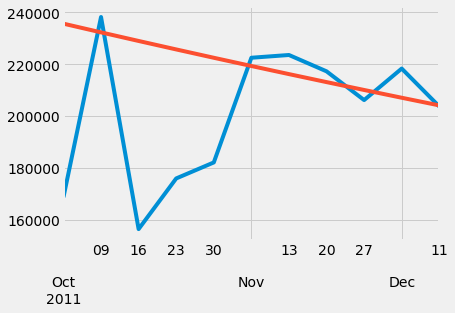

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


# parametros
param = [(1,0,0),(0,0,0,12)]

# modelo
model = SARIMAX(y_train,
                        order=param[0],
                        seasonal_order=param[1],
                        enforce_stationarity=False,
                        enforce_invertibility=False)
# ajustar modelo
model_fit = model.fit(disp=0)

# fecha de las predicciones        
start_index = y_test.index.min()
end_index = y_test.index.max()
y_test.index.min()
preds = model_fit.get_prediction(start=start_index,end=end_index, dynamic=False)
df_temp = pd.DataFrame(
            {
                'y':y_test['TotalPrice'],
                'yhat': preds.predicted_mean
            }
        )

# resultados del ajuste
df_temp.head()
df_temp["y"].plot()
df_temp["yhat"].plot()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn import datasets
from sklearn import tree, model_selection
from sklearn.model_selection import train_test_split

class SarimaModels:
    def __init__(self,params):

        self.params = params
        
        
    @property
    def name_model(self):
        return f"SARIMA_{self.params[0]}X{self.params[1]}".replace(' ','')
    
    @staticmethod
    def test_train_model(y,date):
        mask_ds = y.index < date

        y_train = y[mask_ds]
        y_test = y[~mask_ds]       
        
        return y_train, y_test
    
    def fit_model(self,y,date):
        y_train, y_test = self.test_train_model(y,date )
        model = SARIMAX(y_train,
                        order=self.params[0],
                        seasonal_order=self.params[1],
                        enforce_stationarity=False,
                        enforce_invertibility=False)
        
        model_fit = model.fit(disp=0)

        return model_fit
    
    def df_testig(self,y,date):
        y_train, y_test = self.test_train_model(y,date )
        model = SARIMAX(y_train,
                        order=self.params[0],
                        seasonal_order=self.params[1],
                        enforce_stationarity=False,
                        enforce_invertibility=False)
        
        model_fit = model.fit(disp=0)
        
        start_index = y_test.index.min()
        end_index = y_test.index.max()

        preds = model_fit.get_prediction(start=start_index,end=end_index, dynamic=False)
        df_temp = pd.DataFrame(
            {
                'y':y_test['TotalPrice'],
                'yhat': preds.predicted_mean
            }
        )
        
        return df_temp
    
    def metrics(self,y,date):
        df_temp = self.df_testig(y,date)
        df_metrics = summary_metrics(df_temp)
        df_metrics['model'] = self.name_model
        
        return df_metrics
    


In [ ]:
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

params = list(itertools.product(pdq,seasonal_pdq))
#target_date = '2011-09-01'

In [ ]:
frames = []
for param in params:
    try:
        sarima_model = SarimaModels(param)
        df_metrics = sarima_model.metrics(y,target_date)
        frames.append(df_metrics)
    except:
        pass

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning:

The 'freq' argument in Timestamp is deprecated and will be removed in a future version.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
# juntar resultados de las métricas y comparar
df_metrics_result = pd.concat(frames)
df_metrics_result.sort_values(['mae','mape'])

,mae,mse,rmse,mape,maape,wmape,mmape,smape,model
0,2.411206e+04,1.277209e+09,3.573806e+04,1.386000e-01,0.1332,1.198000e-01,1.386000e-01,0.1198,"SARIMA_(1,0,0)X(0,0,0,12)"
0,2.850106e+04,1.373590e+09,3.706197e+04,1.595000e-01,0.1543,1.416000e-01,1.595000e-01,0.1394,"SARIMA_(0,1,1)X(1,0,0,12)"
0,2.984520e+04,1.465660e+09,3.828394e+04,1.665000e-01,0.1609,1.483000e-01,1.665000e-01,0.1452,"SARIMA_(1,1,0)X(1,0,0,12)"
0,3.018453e+04,1.492819e+09,3.863701e+04,1.683000e-01,0.1626,1.500000e-01,1.683000e-01,0.1466,"SARIMA_(0,1,0)X(1,0,0,12)"
0,3.177936e+04,1.137232e+09,3.372287e+04,1.648000e-01,0.1623,1.579000e-01,1.648000e-01,0.1516,"SARIMA_(1,1,1)X(1,1,1,12)"
...,...,...,...,...,...,...,...,...,...
0,1.979420e+05,4.013089e+10,2.003270e+05,9.806000e-01,0.7746,9.837000e-01,9.806000e-01,1.9361,"SARIMA_(0,0,1)X(0,0,1,12)"
0,2.012135e+05,4.111765e+10,2.027749e+05,1.000000e+00,0.7854,1.000000e+00,1.000000e+00,2.0000,"SARIMA_(0,0,0)X(0,0,0,12)"
0,2.012135e+05,4.111765e+10,2.027749e+05,1.000000e+00,0.7854,1.000000e+00,1.000000e+00,2.0000,"SARIMA_(0,0,0)X(0,0,1,12)"
0,1.718460e+14,5.223454e+28,2.285488e+14,9.158325e+08,1.5708,8.540480e+08,9.158275e+08,2.0000,"SARIMA_(1,0,1)X(0,0,1,12)"


Veamos gráficamente el ajuste del modelo

In [ ]:
# ajustar mejor modelo

param = [(1,0,0),(0,0,0,12)]
sarima_model =  SarimaModels(param)
model_fit = sarima_model.fit_model(y,target_date)
best_model = sarima_model.df_testig(y,target_date)
best_model.head()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning:

The 'freq' argument in Timestamp is deprecated and will be removed in a future version.



,y,yhat
2011-10-02,168804.461,235608.264091
2011-10-09,238163.640,232255.924247
2011-10-16,156551.620,228951.282995
2011-10-23,176047.110,225693.661658
2011-10-30,182202.580,222482.391215


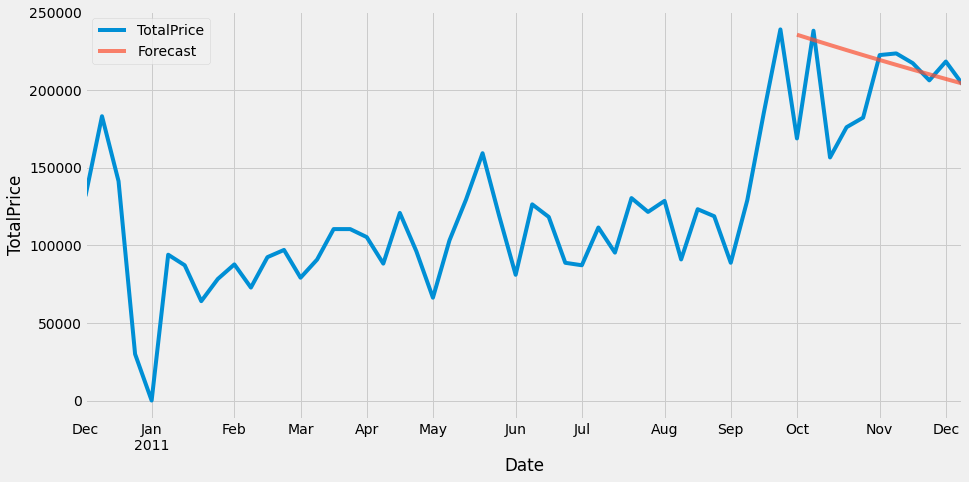

In [ ]:
# graficar mejor modelo

preds = best_model['yhat']
ax = y['1949':].plot(label='observed')
preds.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))
ax.set_xlabel('Date')
ax.set_ylabel('TotalPrice')
plt.legend()
plt.show()

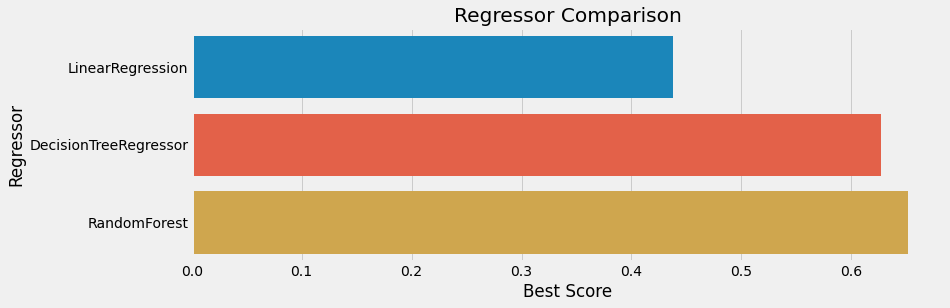

In [ ]:
# Creating summary report
summary_cols = ['Best Score']
summary = pd.DataFrame.from_dict(r2_dict, orient='index')
summary.index.name = 'Regressor'
summary.columns = summary_cols
summary = summary.reset_index()

# Visualizing results
plt.figure(figsize=(12,4))
plt.xlabel('Best score')
plt.title('Regressor Comparison')

sns.barplot(x='Best Score', y='Regressor', data=summary)

In [ ]:
score_dict

{'LinearRegression': 0.4125871227438682,
 'DecisionTreeRegressor': 0.6104962480294266,
 'RandomForest': 0.664786621365228}

# Conclusión:


*   Según las métricas obtenidas para los modelos de regresión, Random Forest sería el que mejor se ajusta a los datos
*   El modelo "Decision Tree Regressor" fue mejor que "Linear Regressor" ya que se necesitan menos supuestos (no colinealidad, distribución normal de los residuos, valores atípicos, etc), y se centra en los resultados obtenidos de las predicciones.
*   El modelo "Decision Tree" es muy inestable, ya que un pequeño cambio en sus datos puede cambiar drásticamente el modelo. Por otro lado, Random Forest utiliza la inestabilidad como una ventaja a través del embolsado (bagging), lo que da como resultado un modelo más estable.
*   Al utilizar el modelo de Sarima para estudiar la serie temporal, pareciera que el modelo no se ajusta bien en comparación a los meses de octubre a diciembre, pero si tiene un buen comportamiento en comparación a los meses anteriores.
*   Se lograría un mejor resultado al predecir el total de ventas si se estudiara una mayor cantidad de años, ya que existen meses donde la demanda es muy superior.









